# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [78]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [79]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    return x*x*numpy.sin(x)

Ensure your function works with numpy arrays:

In [80]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [81]:
def g(x):
    '''Analytical integral of f(x).'''
    return 2*x*numpy.sin(x)-(x**2-2)*numpy.cos(x)-2

Check your solution with the same numpy array:

In [82]:
assert g(0) == 0.

In [83]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [84]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    return g(xmax)-g(xmin)

Check your analytic function:

In [85]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [86]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    h= (xmax-xmin)/N
    k=0.0
    x=xmin + 0.5*h
    for i in range(1,N+1):
        k += 4*f(x)
        x+= h 
        
    x = xmin +h
    for i in range(1, N):
        k += 2*f(x)
        x += h
    return (h/6)*(f(xmin)+f(xmax)+k)

Make sure you have implemented Simpson's rule correctly:

In [87]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [88]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


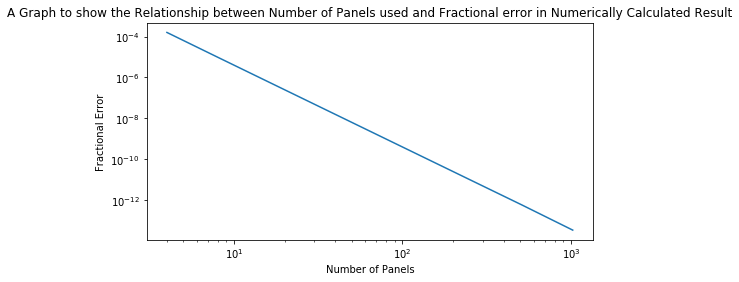

In [90]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution

fractional_error = []
for num in panel_counts:
    fractional_error.append(abs((integrate_numeric(x0,x1,num)/result_analytic)-1))


plt.figure(figsize=(8, 4))
plt.xlabel("Number of Panels")
plt.ylabel("Fractional Error")
plt.title("A Graph to show the Relationship between Number of Panels used and Fractional error in Numerically Calculated Result")
plt.loglog(panel_counts, fractional_error)


What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

As you can see from the graph, as you increase the number of panels, the fractional error decreases exponentially and hense the accuracy of the Simpson's method is increasing. However when the number of panels is too large, the width of the panels (h) because infitesimally small. This means the numerical method will loose accuracy due to floating point numbers only being able to be stored to a certain number of decimal places, and therefore leading to round off errors(the fractial error will increase, but wont be a straight line).

If the trapezium rule was being used, how would the panel
count affect accuracy? 

Similarly to the Simpson's method, as the panel count increases, the accuracy increases but at a slower rate then Simpson's method. This is due to the fact that the panels width would be smaller and therefore the top of the trapezium will follow the slope of the function more closely and the accuracy of this numerical method would increase. However, again similarly to Simpson's, when the number of panels becomes too large, the width of the panels (h) because infitesimally small. This means the numerical method will loose accuracy due to floating point numbers only being able to be stored to a certain number of decimal places, and therefore leading to round off errors (the fractional error will start generally increasing).